pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_score, auc, recall_score

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')


## Data overlook

In [2]:
df = pd.read_csv('/Users/annabellgao/Library/Mobile Documents/com~apple~CloudDocs/Learn/GSU/Spring 2023/Data mining/Project/Churn_DM_Dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## Data exploration

In [5]:
## drop inrrelavant column: area code & phone number
df = df.drop(['phone number','area code'],axis=1)
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [6]:
## all continous variables
df_cont = df.select_dtypes(include=[np.number])
## all categorical variable
df_cat = df.select_dtypes(exclude=[np.number])
df_cat = df_cat.drop('churn', axis=1)

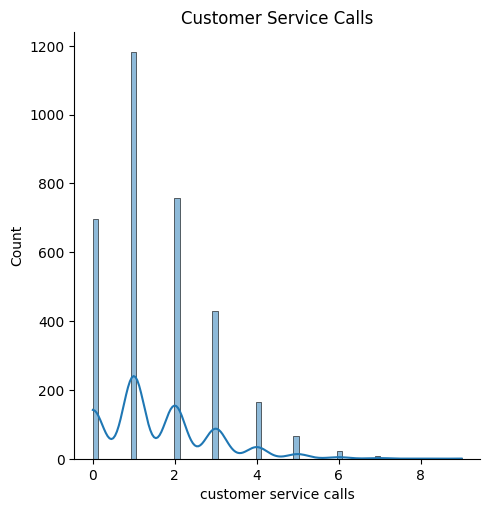

In [7]:
## check if normal distribution
sns.displot(x=df['customer service calls'],kind='hist',kde=True).set(title='Customer Service Calls')

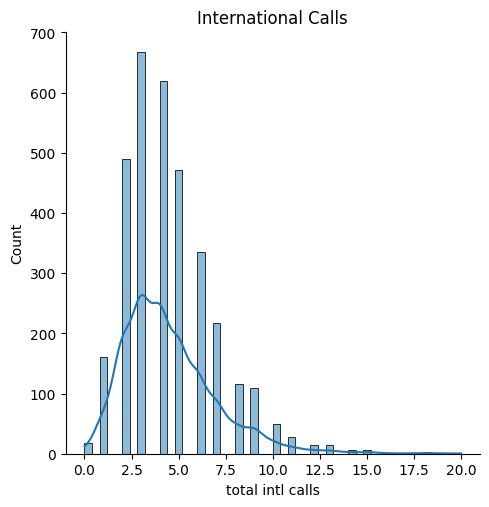

In [8]:
sns.displot(x=df['total intl calls'],kind='hist',kde=True).set(title='International Calls')


<AxesSubplot: >

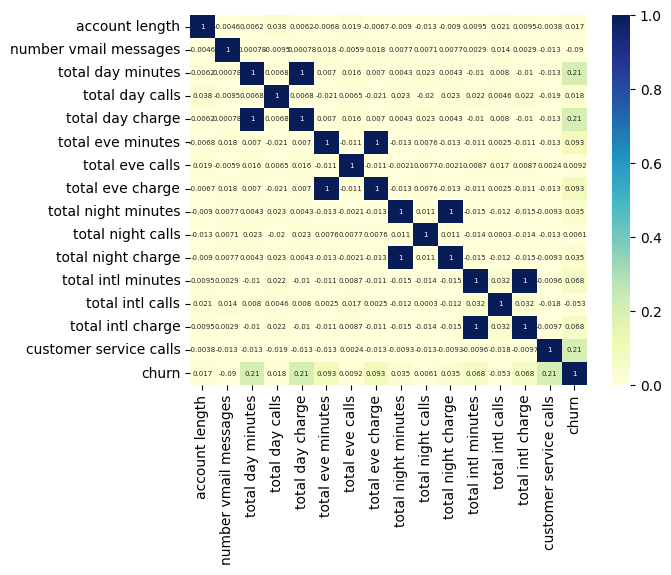

In [9]:
sns.heatmap(df.corr(),vmin=0, vmax=1, cmap="YlGnBu", annot=True, annot_kws={"fontsize":5})

In [10]:
# check the balance of target variable
print(df['churn'].value_counts())

False    2850
True      483
Name: churn, dtype: int64


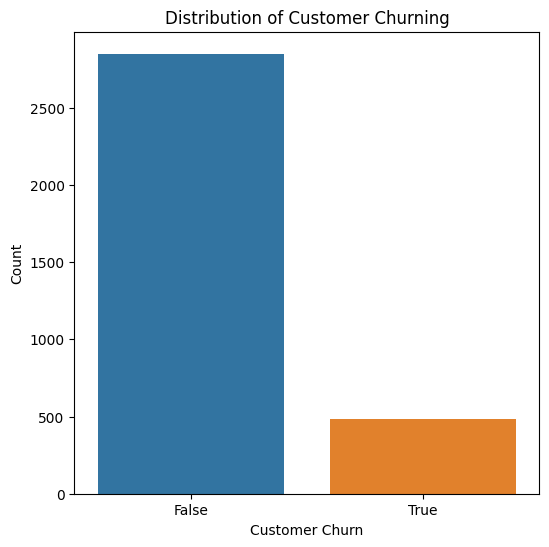

In [11]:
plt.figure(figsize=(6,6));
sns.countplot(x= df.churn);
plt.xlabel('Customer Churn');
plt.ylabel('Count');
plt.title('Distribution of Customer Churning');
plt.show()

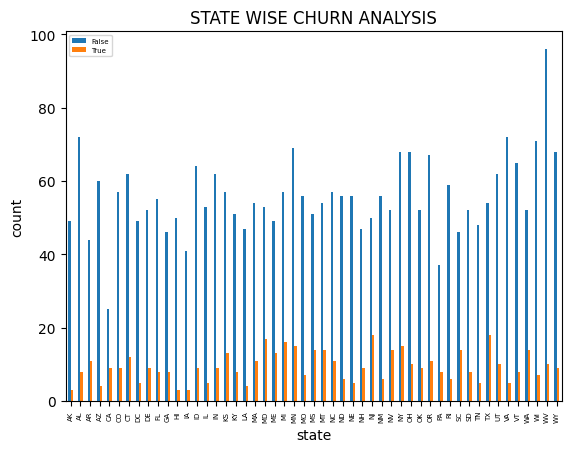

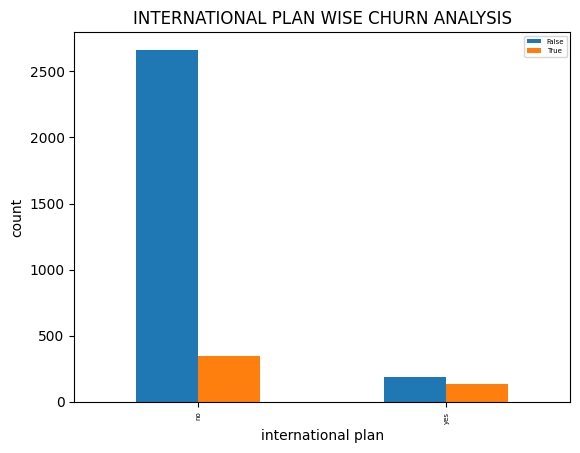

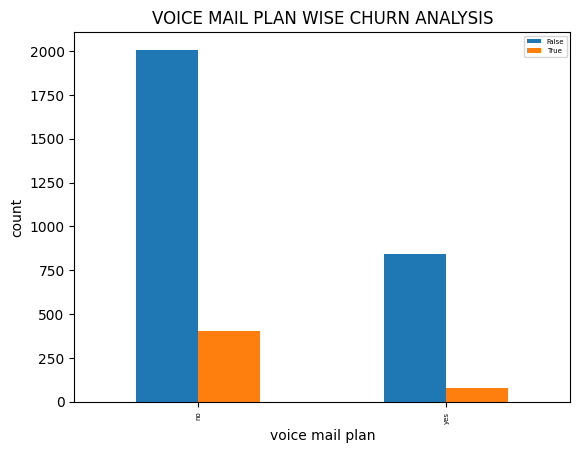

In [12]:
# catigorical variable-wise bar graph
for c in df_cat.columns:
    df.groupby([c,'churn']).size().unstack(level=-1).plot(kind='bar')
    plt.xlabel(c)
    plt.xticks(fontsize = 5)
    plt.yticks(fontsize = 10)
    plt.ylabel('count')
    plt.title('{X} wise Churn analysis'.format(X=c).upper())
    plt.legend(fontsize=5)
    plt.show()


In [13]:
num_vmail = df.groupby('number vmail messages')['churn'].value_counts(normalize=True)
num_vmail = pd.DataFrame(num_vmail)
num_vmail.columns = ['value']
num_vmail = num_vmail.reset_index()

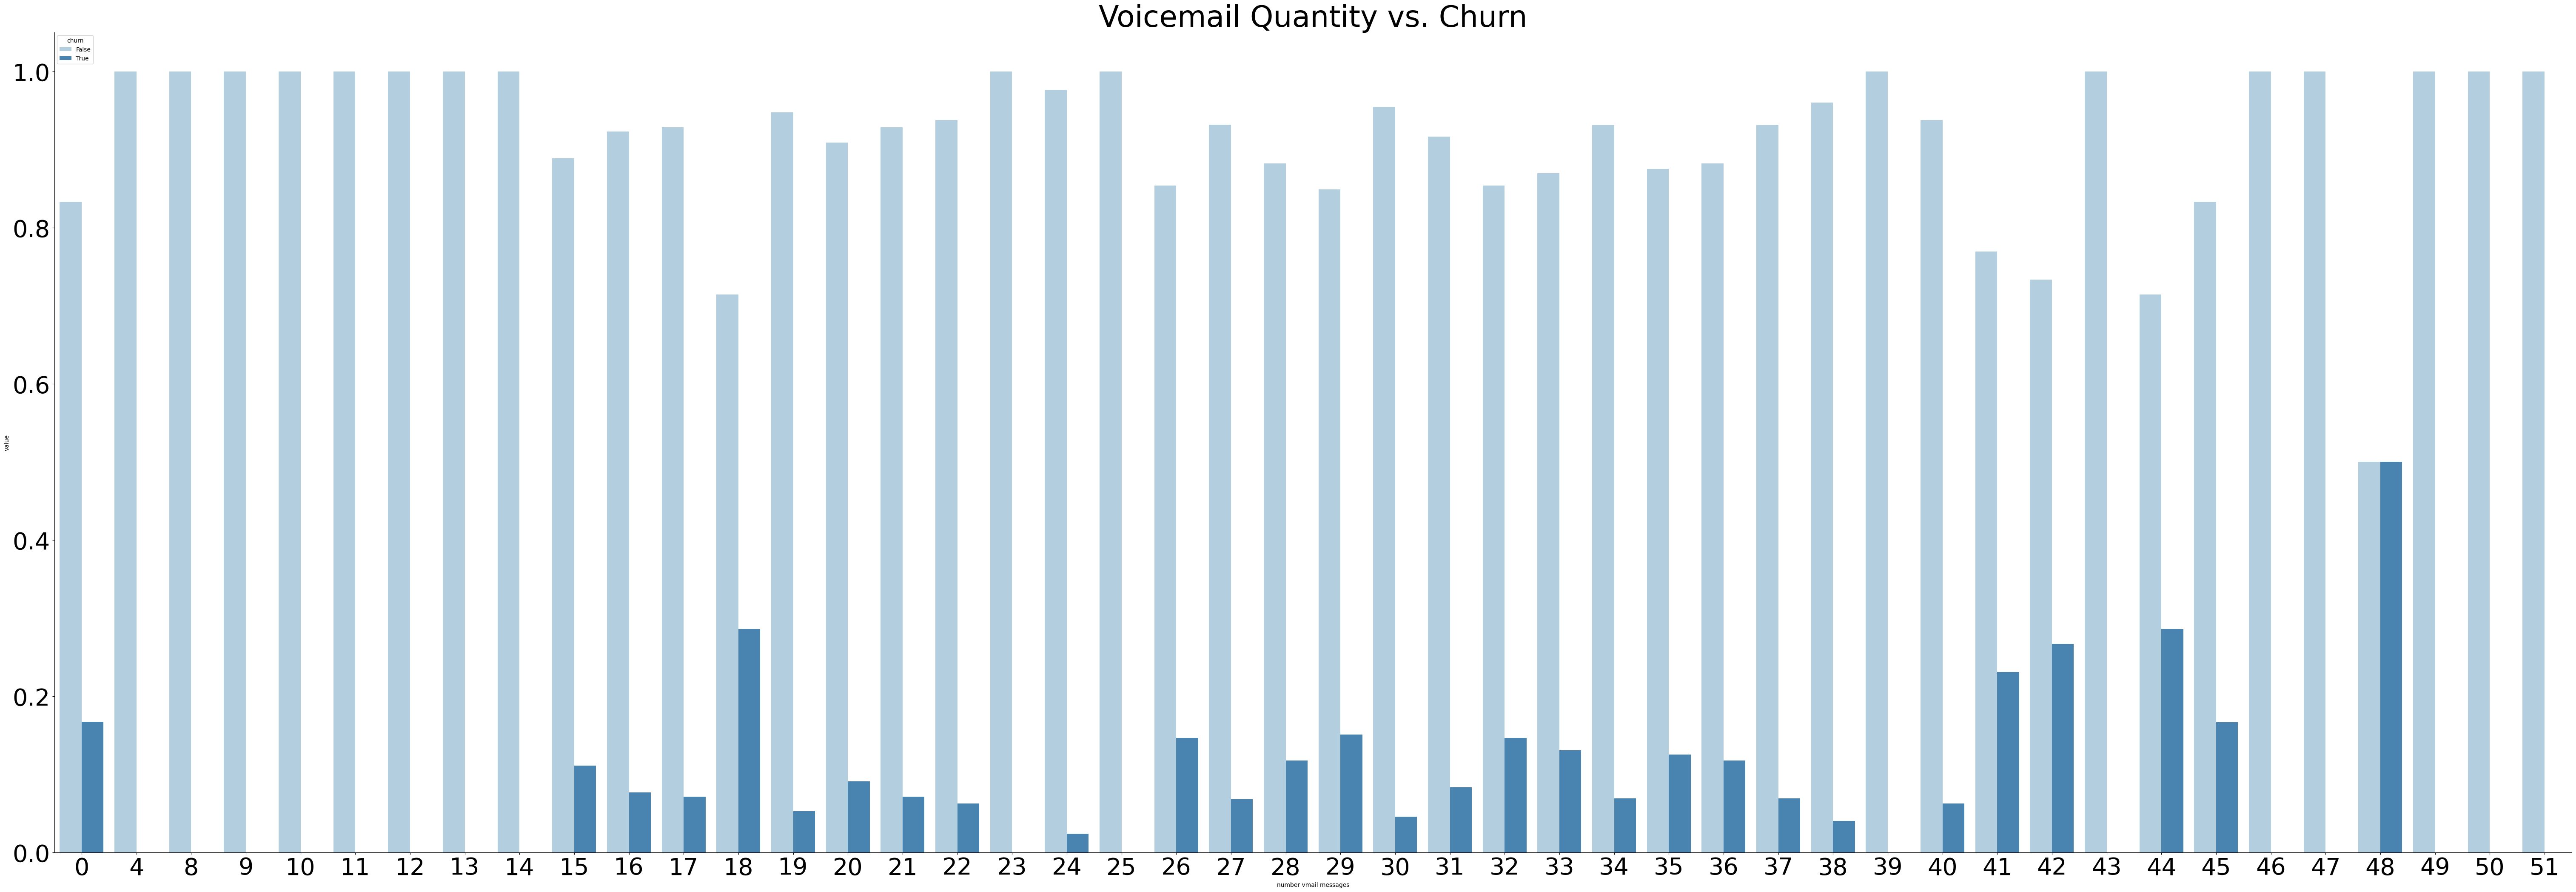

In [14]:
sns.catplot(data = num_vmail, kind = 'bar', x = 'number vmail messages', y = 'value', 
            hue = 'churn', palette = 'Blues', alpha=1, height=20, aspect=3 , legend_out = False, )
plt.title('Voicemail Quantity vs. Churn', fontsize = 50);
plt.xticks(fontsize = 40);
plt.yticks(fontsize = 40);

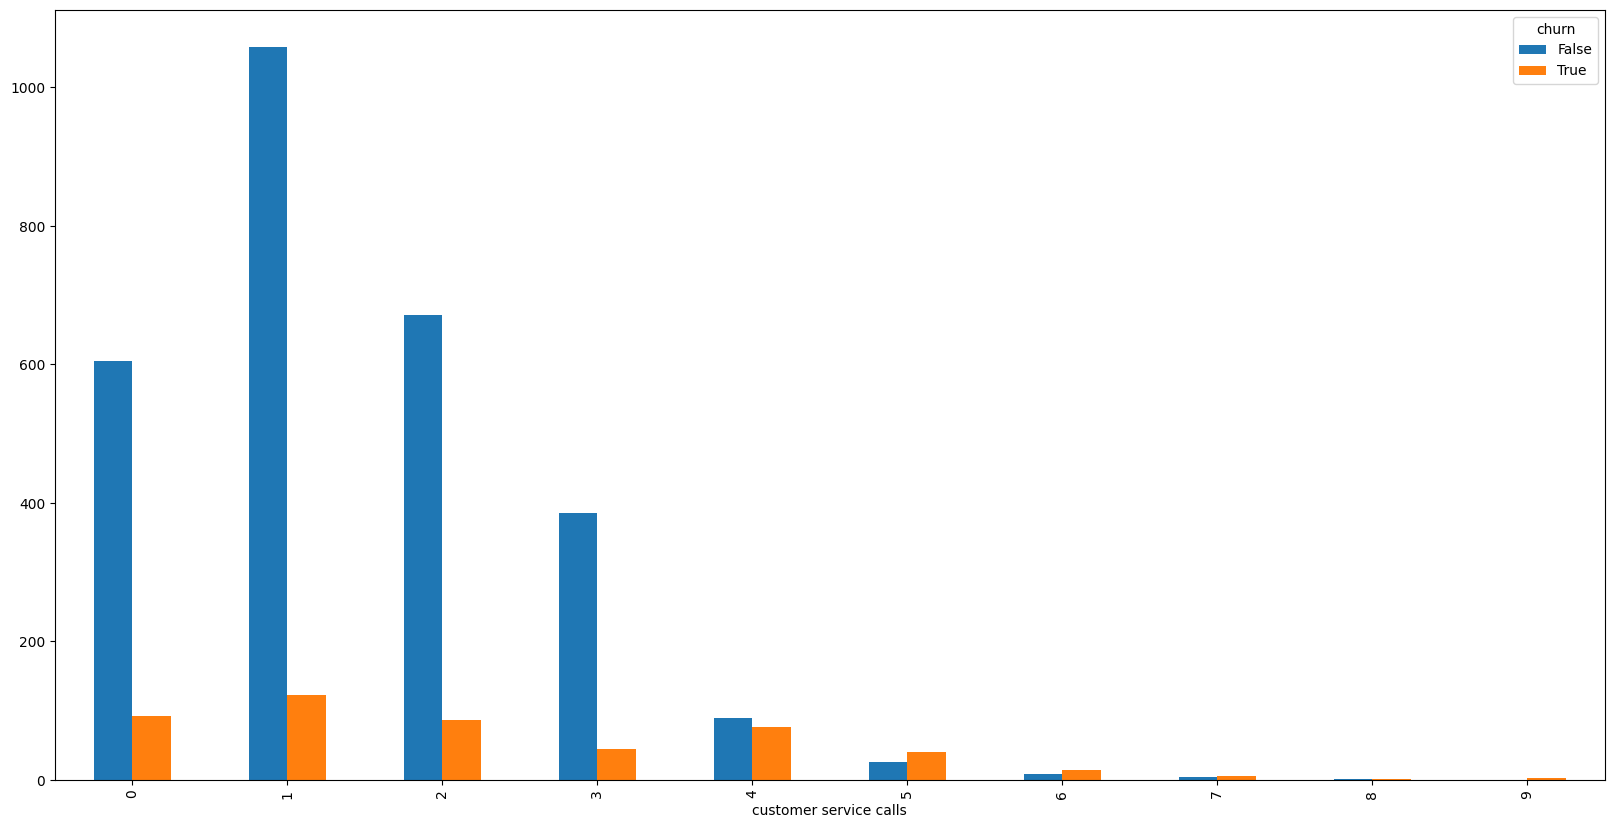

In [15]:
df.groupby(['customer service calls' , 'churn']).size().unstack(level = -1).plot(kind = 'bar' , 
                                                                                 figsize = (20,10));

In [16]:
customer_service_calls =round(df.groupby('customer service calls')['churn'].value_counts(normalize = True),2)
customer_service_calls

customer service calls  churn
0                       False    0.87
                        True     0.13
1                       False    0.90
                        True     0.10
2                       False    0.89
                        True     0.11
3                       False    0.90
                        True     0.10
4                       False    0.54
                        True     0.46
5                       True     0.61
                        False    0.39
6                       True     0.64
                        False    0.36
7                       True     0.56
                        False    0.44
8                       False    0.50
                        True     0.50
9                       True     1.00
Name: churn, dtype: float64

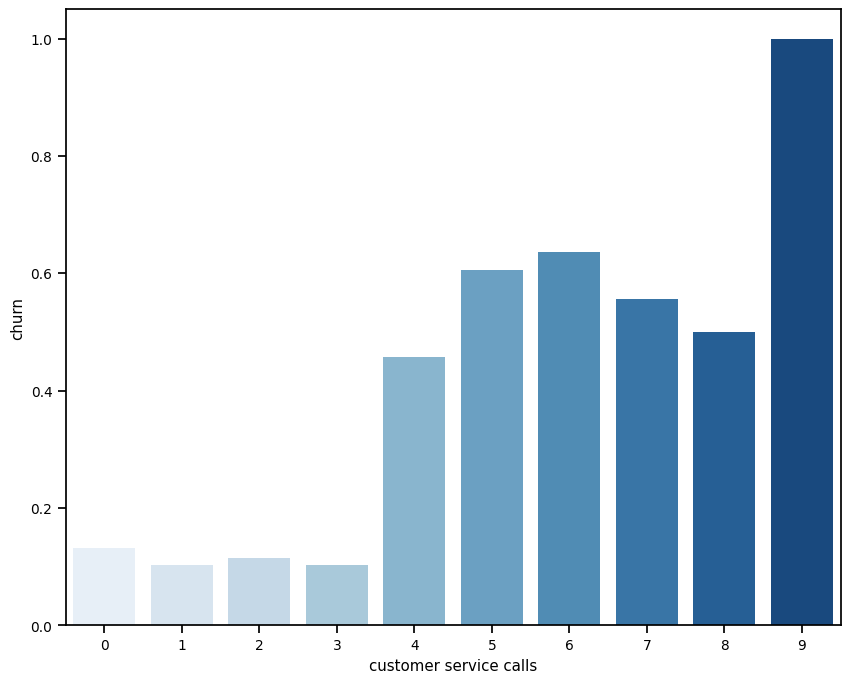

In [17]:
sns.set_context('notebook', font_scale = 0.9)
plt.figure(figsize=(10, 8))
sns.barplot(x='customer service calls', y='churn', data=df, palette = 'Blues' , ci=None);

## Feature engineering

In [18]:
# Create new feature adding  all 'charge' categories for a new 'total charge' column

df['total charge'] = (df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge'])

In [19]:
df.groupby('churn').mean().reset_index()

,churn,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total charge
0,False,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825,58.448807
1,True,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814,65.355963


In [20]:
for i in df_cont.columns:
    q75, q25 = np.percentile(df_cont.loc[:,i], [75 ,25])
    iqr = q75 - q25
    lower = q25 - (iqr*1.5)
    upper = q75 + (iqr*1.5)
    lower_outliers = len(df_cont.loc[df_cont.loc[:,i] < lower,i])
    upper_outliers = len(df_cont.loc[df_cont.loc[:,i] > upper,i])
    print('{columns} ---> {X}  outliers'.format(columns = i, X = (upper_outliers + lower_outliers)))

account length ---> 18  outliers
number vmail messages ---> 1  outliers
total day minutes ---> 25  outliers
total day calls ---> 23  outliers
total day charge ---> 25  outliers
total eve minutes ---> 24  outliers
total eve calls ---> 20  outliers
total eve charge ---> 24  outliers
total night minutes ---> 30  outliers
total night calls ---> 22  outliers
total night charge ---> 30  outliers
total intl minutes ---> 46  outliers
total intl calls ---> 78  outliers
total intl charge ---> 49  outliers
customer service calls ---> 267  outliers


## Data preprocessing

In [21]:
# converting  catgeorical variables such as churn, internation plan, and voicemail plan to 0 & 1.
df['vmail plan'] = df['voice mail plan'].map(lambda x:1 if x == 'yes' else 0)
df['int_plan'] = df['international plan'].map(lambda x:1 if x == 'yes' else 0)
df['churn_'] = df['churn'].map(lambda x:1 if x == True else 0)
df = df.drop(['international plan' , 'voice mail plan' , 'churn'] , axis=1)
df.head()

,state,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total charge,vmail plan,int_plan,churn_
0,KS,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,75.56,1,0,0
1,OH,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,59.24,1,0,0
2,NJ,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,62.29,0,0,0
3,OH,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,66.80,0,1,0
4,OK,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,52.09,0,1,0


In [22]:
#drop columns that have multicollinearty

df.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis =1, inplace= True)

<AxesSubplot: >

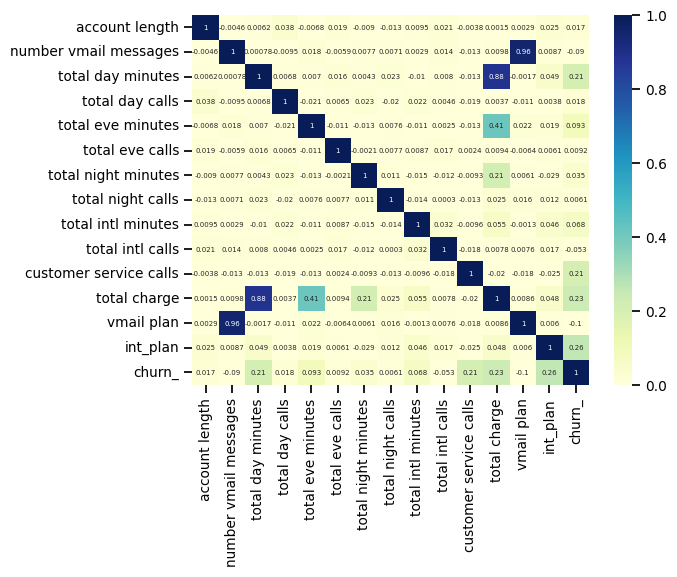

In [23]:
sns.heatmap(df.corr(),vmin=0, vmax=1, cmap="YlGnBu", annot=True, annot_kws={"fontsize":5})

<AxesSubplot: >

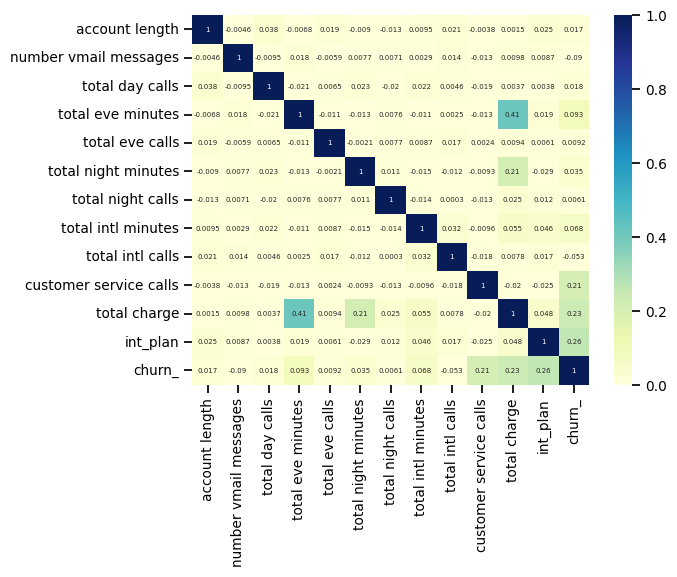

In [24]:
# voice mail plan drop total day minutes
df = df.drop(['vmail plan' , 'total day minutes'] ,  axis=1)
sns.heatmap(df.corr(),vmin=0, vmax=1, cmap="YlGnBu", annot=True, annot_kws={"fontsize":5})

### split train and test

In [25]:

X = df.drop('churn_',axis=1)
y = df['churn_']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2499, 13) (2499,)
(834, 13) (834,)


### encoding state

In [27]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
X_tr_cat = X_train[['state']]
X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat),columns=ohe.get_feature_names_out(X_tr_cat.columns), index=X_tr_cat.index)

X_tr_num = X_train.drop('state', axis = 1)
X_tr = X_tr_num.join(X_tr_ohe)
X_tr.head()

,account length,number vmail messages,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
1066,117,25,140,224.1,69,267.9,112,11.8,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1553,86,0,93,214.7,95,228.7,70,11.3,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2628,37,0,126,204.5,110,118.0,98,6.8,3,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,130,0,113,290.3,111,114.9,140,7.2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984,77,0,112,306.3,111,196.5,82,9.9,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X_test_cat = X_test[['state']]
X_test_ohe = pd.DataFrame(ohe.fit_transform(X_test_cat),columns=ohe.get_feature_names_out(X_test_cat.columns), 
                          index=X_test_cat.index)

X_test_num = X_test.drop('state', axis = 1)
X_te = X_test_num.join(X_test_ohe)
X_te.head()

,account length,number vmail messages,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
465,71,0,113,167.8,94,182.1,111,13.6,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2416,113,0,141,256.8,72,175.3,123,11.9,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1785,45,29,104,222.5,101,235.6,92,7.9,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1316,10,0,103,214.8,77,206.4,73,8.7,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,88,0,116,236.0,138,179.1,110,9.6,4,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SMOTE the imbalanced data

In [29]:
y_train.value_counts()

0    2127
1     372
Name: churn_, dtype: int64

In [30]:
y_test.value_counts()

0    723
1    111
Name: churn_, dtype: int64

In [31]:
smote = SMOTE(random_state=42)
X_tr_sm , y_tr_sm = smote.fit_resample(X_tr,y_train)
print(X_tr_sm.shape,y_tr_sm.shape)

(4254, 63) (4254,)


In [32]:
y_tr_sm.value_counts()

0    2127
1    2127
Name: churn_, dtype: int64

### normalize the data

In [33]:
scaler = StandardScaler()
scaler.fit(X_tr_sm)
X_tr_sm_scaled = scaler.transform(X_tr_sm)
X_tr_sm_scaled= pd.DataFrame(X_tr_sm_scaled, columns=X_tr_sm.columns)
X_test_scaled = scaler.transform(X_te)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_te.columns)


## Model 1 : Logistic Regression

In [34]:
logisreg = LogisticRegression()
logisreg.fit(X_tr_sm_scaled,y_tr_sm) 
y_pred = logisreg.predict(X_test_scaled)



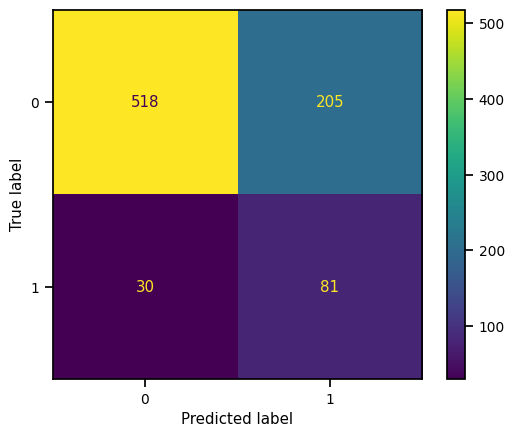

In [35]:
cm = confusion_matrix(y_test,y_pred,labels=logisreg.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisreg.classes_).plot()

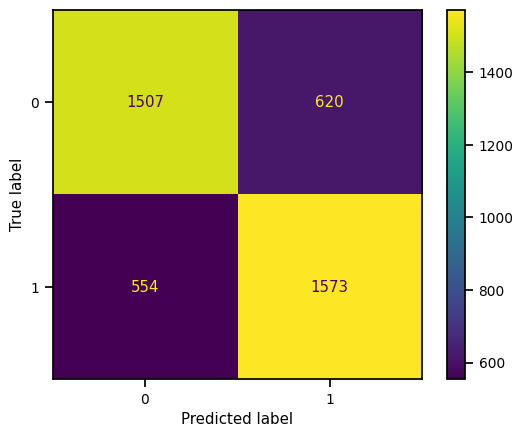

In [36]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_tr_sm,logisreg.predict(X_tr_sm_scaled),labels=logisreg.classes_), display_labels=logisreg.classes_).plot()

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       723
           1       0.28      0.73      0.41       111

    accuracy                           0.72       834
   macro avg       0.61      0.72      0.61       834
weighted avg       0.86      0.72      0.76       834



AUC: 0.7885437304524442


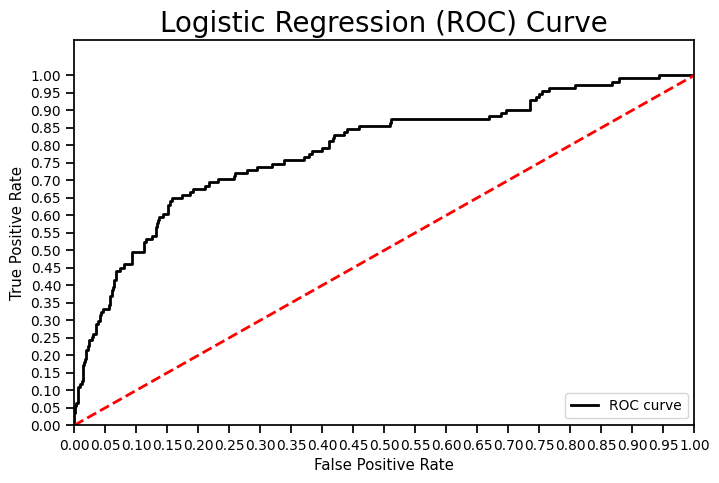

In [40]:
##probablity score
y_score = logisreg.fit(X_tr_sm_scaled,y_tr_sm).decision_function(X_test_scaled)

fpr, tpr, thresholds=roc_curve(y_test,y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(8, 5))
lw = 2
plt.plot(fpr, tpr, color = 'black',lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'red', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.1])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (ROC) Curve' , fontdict={'fontsize': 20})
plt.legend(loc='lower right')
plt.show()



## Model 2 : Decision Tree

In [42]:
dc = DecisionTreeClassifier()
dc.fit(X_tr_sm_scaled,y_tr_sm)
y_pred = dc.predict(X_test_scaled)

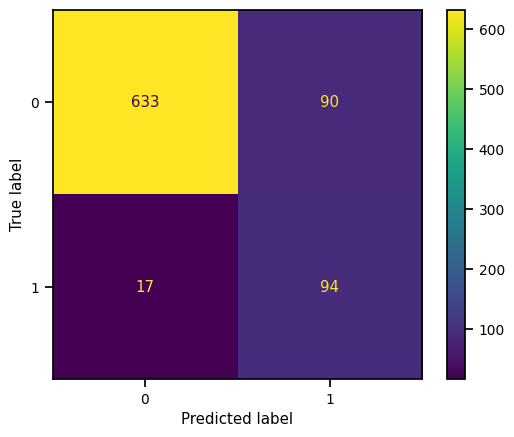

In [43]:
cm = confusion_matrix(y_test,y_pred,labels=dc.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dc.classes_).plot()

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       723
           1       0.51      0.85      0.64       111

    accuracy                           0.87       834
   macro avg       0.74      0.86      0.78       834
weighted avg       0.91      0.87      0.88       834



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      2127

    accuracy                           1.00      4254
   macro avg       1.00      1.00      1.00      4254
weighted avg       1.00      1.00      1.00      4254



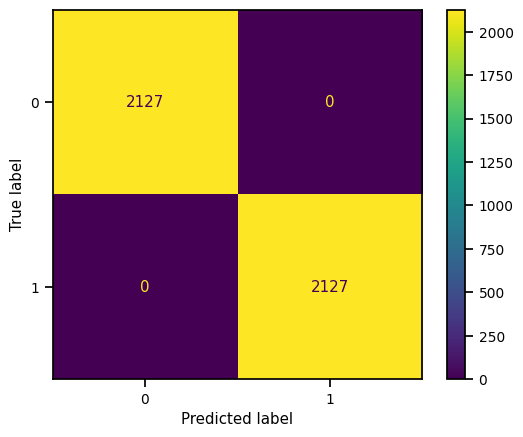

In [65]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_tr_sm,dc.predict(X_tr_sm_scaled),labels=dc.classes_), display_labels=dc.classes_).plot()
print(classification_report(y_tr_sm,dc.predict(X_tr_sm_scaled)))

## overfitting

AUC: 0.8584165077941012


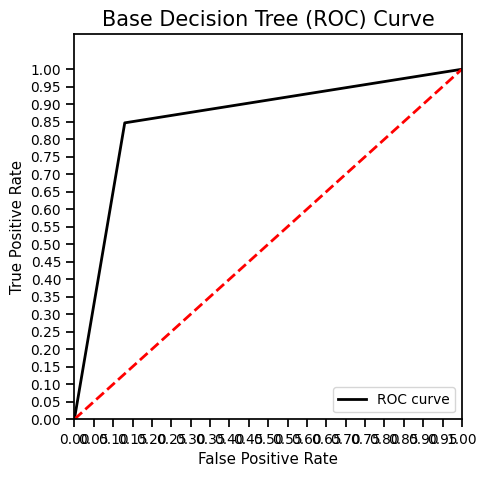

In [55]:
fpr, tpr, thresholds=roc_curve(y_test,dc.predict(X_test_scaled))

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr, tpr, color = 'black',lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'red', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.1])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Base Decision Tree (ROC) Curve' , fontdict={'fontsize': 15})
plt.legend(loc='lower right')
plt.show()

## Model 3 : Decision Tree with Tuned Parameters

In [73]:
params = [    
    {'max_depth' : [1, 10, 10],
    'min_samples_split' : [1, 10, 10],
    'min_samples_leaf' : [0.1, 0.5, 5]
    }]

grv_dc = GridSearchCV(dc,param_grid=params, cv=3,verbose=True, n_jobs=-1)
grv_dc .fit(X_tr_sm_scaled,y_tr_sm)

print(grv_dc.best_estimator_)
print(grv_dc.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)
0.8272214386459803


In [74]:
# Create tunned Decision Tree model

dc2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)
                       
dc2.fit(X_tr_sm_scaled , y_tr_sm)
y_pred = dc2.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       723
           1       0.65      0.86      0.74       111

    accuracy                           0.92       834
   macro avg       0.82      0.90      0.85       834
weighted avg       0.93      0.92      0.93       834



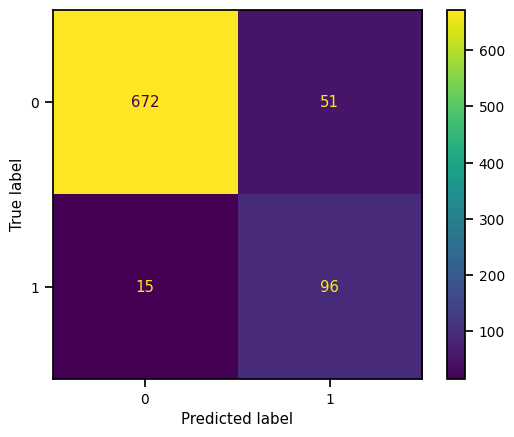

In [75]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,dc2.predict(X_test_scaled),labels=dc2.classes_), display_labels=dc2.classes_).plot()
print(classification_report(y_test,dc2.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2127
           1       0.95      0.80      0.87      2127

    accuracy                           0.88      4254
   macro avg       0.89      0.88      0.88      4254
weighted avg       0.89      0.88      0.88      4254



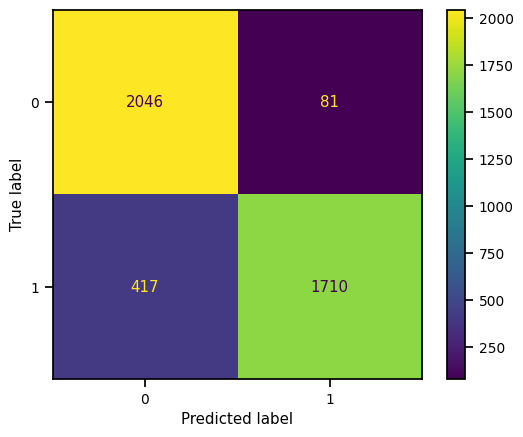

In [76]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_tr_sm,dc2.predict(X_tr_sm_scaled),labels=dc2.classes_), display_labels=dc2.classes_).plot()
print(classification_report(y_tr_sm,dc2.predict(X_tr_sm_scaled)))

AUC: 0.897162722888864


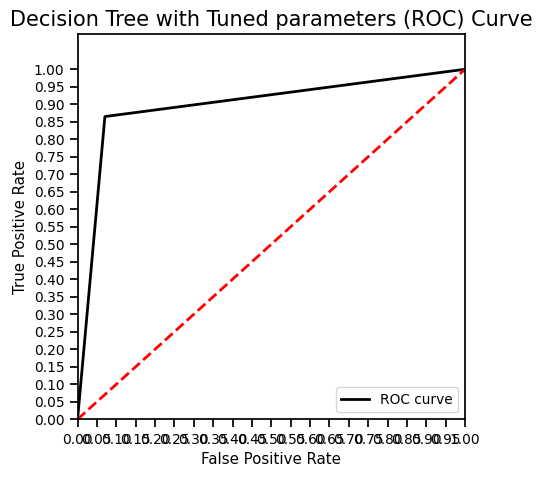

In [77]:
fpr, tpr, thresholds=roc_curve(y_test,dc2.predict(X_test_scaled))

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr, tpr, color = 'black',lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'red', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.1])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree with Tuned parameters (ROC) Curve' , fontdict={'fontsize': 15})
plt.legend(loc='lower right')
plt.show()

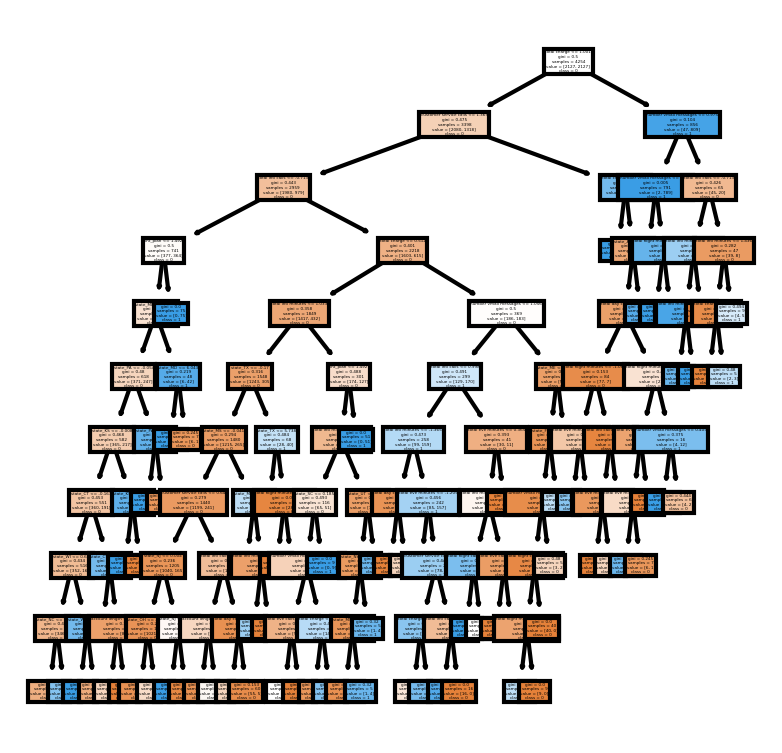

In [80]:
# Graph Decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(dc2,
               feature_names = X_tr_sm_scaled.columns, 
               class_names=np.unique(y_tr_sm).astype('str'),
               filled=True
               )
plt.show()

## Model 4 : Random Forest with tuned parameters

In [81]:
rf = RandomForestClassifier()
rf.fit(X_tr_sm_scaled,y_tr_sm)

RandomForestClassifier()

In [84]:
param_rf = [    
   {'min_samples_leaf' : [1, 2, 4],
    'n_estimators' : [100, 200, 300],
    'min_samples_split' : [2, 5, 10],
     'max_depth' : [10, 20, 30, 40, 50]
    }]

grv_rf = GridSearchCV(rf,param_grid=param_rf, cv=3,verbose=True, n_jobs=-1)
grv_rf.fit(X_tr_sm_scaled,y_tr_sm)

print(grv_rf.best_estimator_)
print(grv_rf.best_score_)


Fitting 3 folds for each of 135 candidates, totalling 405 fits
RandomForestClassifier(max_depth=50, n_estimators=200)
0.9473436765397274


In [85]:
rf2 = RandomForestClassifier(max_depth= 50 , n_estimators = 400 ,max_features='log2', random_state = 42)

rf2.fit(X_tr_sm_scaled , y_tr_sm)

RandomForestClassifier(max_depth=50, max_features='log2', n_estimators=400,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       723
           1       0.87      0.65      0.74       111

    accuracy                           0.94       834
   macro avg       0.91      0.82      0.85       834
weighted avg       0.94      0.94      0.94       834



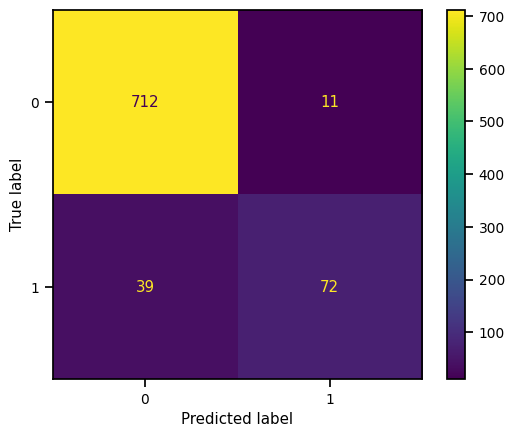

In [86]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,rf2.predict(X_test_scaled),labels=rf2.classes_), display_labels=rf2.classes_).plot()
print(classification_report(y_test,rf2.predict(X_test_scaled)))

AUC: 0.8167171320698292


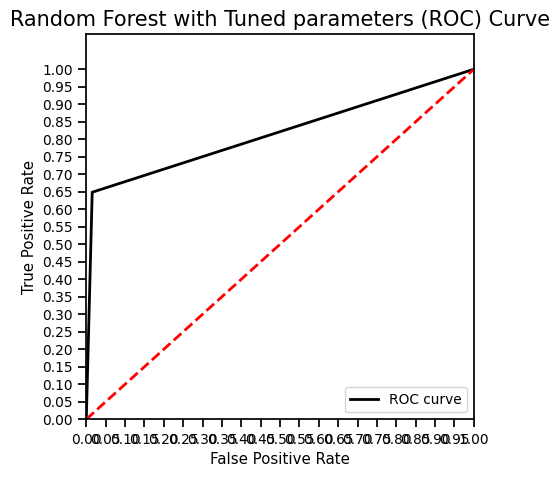

In [87]:
fpr, tpr, thresholds=roc_curve(y_test,rf2.predict(X_test_scaled))

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr, tpr, color = 'black',lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'red', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.1])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with Tuned parameters (ROC) Curve' , fontdict={'fontsize': 15})
plt.legend(loc='lower right')
plt.show()

## Summary

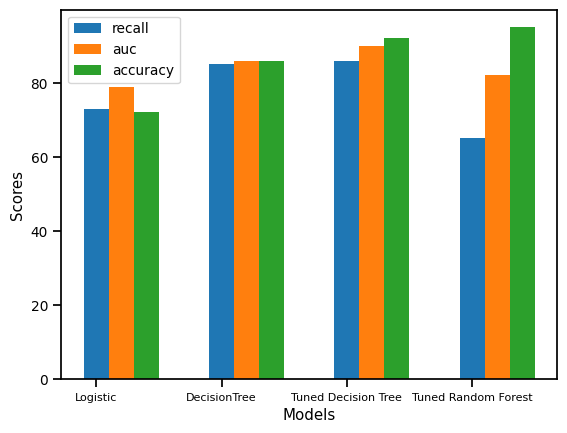

In [97]:
recall = [73,85,86,65]
auc = [79,86,90,82]
accuracy = [72,86,92,95]
model = ['Logistic', 'DecisionTree','Tuned Decision Tree','Tuned Random Forest']

x_axis = np.arange(len(model))

bar1 = plt.bar(x_axis,recall,0.2,label='recall')
bar2 = plt.bar(x_axis+0.2,auc,0.2,label='auc')
bar3 = plt.bar(x_axis+0.4,accuracy,0.2,label='accuracy')

plt.xticks(x_axis, model,fontsize = 8)

plt.xlabel("Models")
plt.ylabel("Scores")

plt.legend(loc = 0)
plt.show()

## importatnt festures

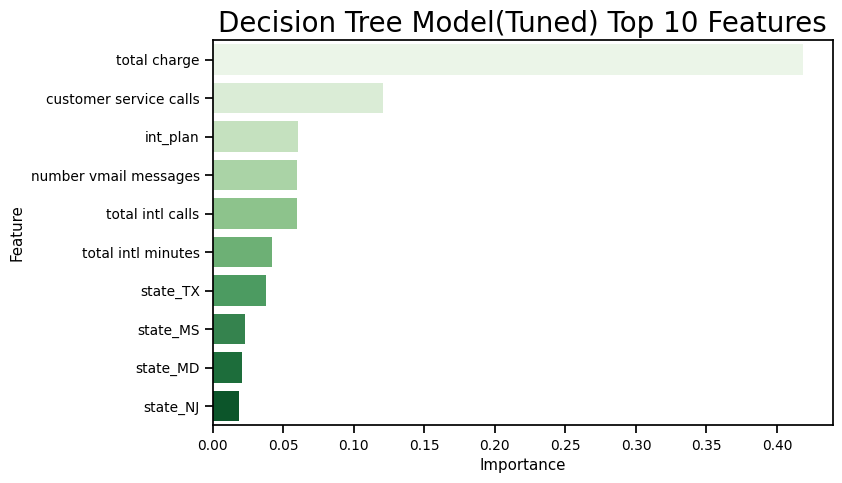

In [108]:
feature_dc2 = pd.DataFrame(zip(X_tr_sm_scaled.columns, dc2.feature_importances_),columns=['Feature', 'Importance'])

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', 
            data=feature_dc2.sort_values(by='Importance', key=abs, ascending=False).head(10), orient='h', ax=ax ,
           palette = 'Greens');
plt.title('Decision Tree Model(Tuned) Top 10 Features' , fontdict={'fontsize' : 20});